In [1]:
#dependencies
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from ipywidgets import widgets

In [2]:
#import data from combined csv
df = pd.read_csv('data/cleaned_data.csv')
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df.head(1)


,video_id,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,Country Code,Days to trend
0,2kyS6SvSYSE,2017-11-14,22,2017-11-13,748374,57527,2966,15954,US,1 days 00:00:00.000000000


In [3]:
#dictionary of the category names. Utilized json files to match category id to category names.
catdict = {1:'Film and Animation',2:'Autos and Vehicles',10:'Music',15:'Pets and Animals',17:'Sports',19:'Travel and Events',
          20:'Gaming',22:'People and Blogs',23:'Comedy',24:'Entertainment',25:'News and Politics',26:'Howto and Style',27:'Education',
          28:'Science and Technology',29:'Nonprofits and Activism',30:'Movies',43:'Shows'} 


In [4]:
catlist = df['category_id']
catcount = catlist.reset_index().groupby('category_id').agg('count').head(16)
catcount.reset_index(inplace=True)

#map category_id to category_name
catcount["category_name"] = catcount["category_id"].map(catdict)  
catcount

,category_id,index,category_name
0,1,19661,Film and Animation
1,2,4516,Autos and Vehicles
2,10,41751,Music
3,15,4667,Pets and Animals
4,17,22027,Sports
5,19,1716,Travel and Events
6,20,10937,Gaming
7,22,50497,People and Blogs
8,23,26300,Comedy
9,24,103541,Entertainment


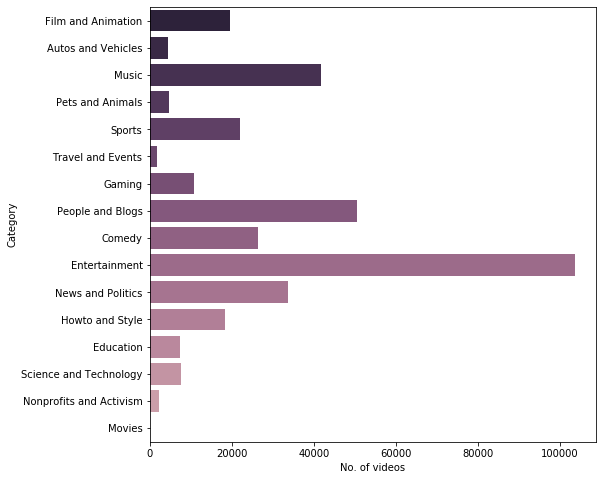

<Figure size 432x288 with 0 Axes>

In [11]:
#Top category Names grouped by all countries
category = catcount.groupby("category_name").size().reset_index(name="index") \
    .sort_values("index", ascending=False).head(20)

figure, ax = plt.subplots(figsize=(8,8))
figure = sns.barplot(x="index", y="category_name", data=catcount,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
figure = ax.set(xlabel="No. of videos", ylabel="Category")
plt.show()

# Save the Figure
plt.savefig("C:\\Users\\richn\\Desktop\category.png")

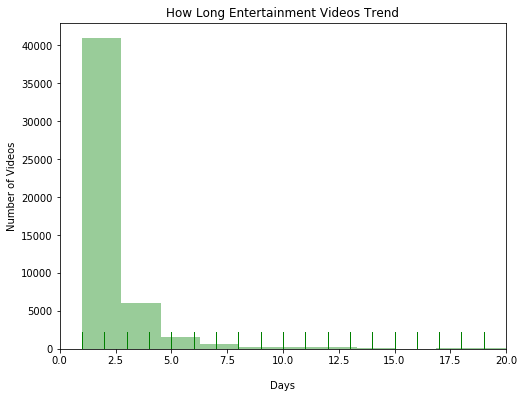

In [6]:
#how much time passes between published and trending videos? Utlized the top 3 most watched category id's. 

cat24 = df[df['category_id'] == 24]
cat24grpd = cat24.groupby('video_id').agg('count')['Country Code'] #how many days does the same video_id repeat for

plt.figure(figsize=(8, 6))
ax = sns.distplot(cat24grpd,bins=50,kde=False,rug=True,color="g")
ax.set_xlim(0,20)
ax.xaxis.labelpad = 15
ax.set_title('How Long Entertainment Videos Trend')
ax.set_xlabel("Days")
ax.set_ylabel("Number of Videos")

# Save the Figure
plt.savefig("C:\\Users\\richn\\Desktop\Entertainment.png")

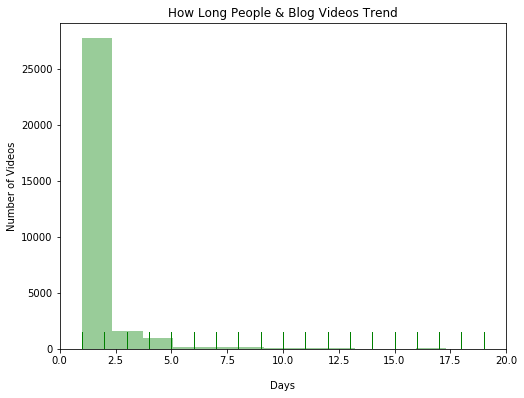

In [7]:
cat24 = df[df['category_id'] == 22]
cat24grpd = cat24.groupby('video_id').agg('count')['Country Code'] #how many days does the same video_id repeat for.

plt.figure(figsize=(8, 6))
ax = sns.distplot(cat24grpd,bins=50,kde=False,rug=True,color="g")
ax.set_xlim(0,20)
ax.xaxis.labelpad = 15
ax.set_title('How Long People & Blog Videos Trend')
ax.set_xlabel("Days")
ax.set_ylabel("Number of Videos")
# Save the Figure
plt.savefig("C:\\Users\\richn\\Desktop\people_blog.png")

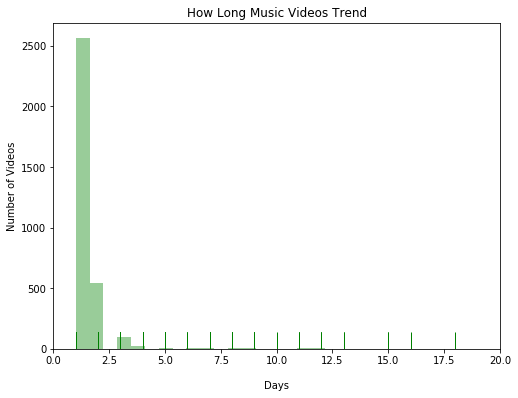

In [8]:
cat24 = df[df['category_id'] == 2]
cat24grpd = cat24.groupby('video_id').agg('count')['Country Code'] #how many days does the same video_id repeat for.

plt.figure(figsize=(8, 6))
ax = sns.distplot(cat24grpd,bins=50,kde=False,rug=True,color="g")
ax.set_xlim(0,20)
ax.xaxis.labelpad = 15
ax.set_title('How Long Music Videos Trend')
ax.set_xlabel("Days")
ax.set_ylabel("Number of Videos")
# Save the Figure
plt.savefig("C:\\Users\\richn\\Desktop\music.png")

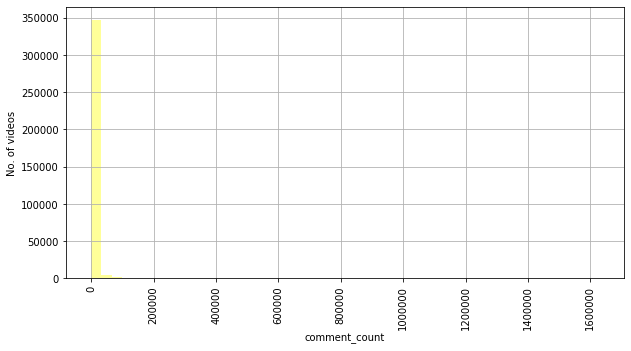

In [9]:
figure, ax = plt.subplots(figsize=(10,5))
figure = sns.distplot(df["comment_count"], color="yellow",kde=False,ax=ax)
figure = ax.set(xlabel="comment_count", ylabel="No. of videos")
figure = plt.xticks(rotation=90)
plt.grid(axis='both')
plt.show(figure)

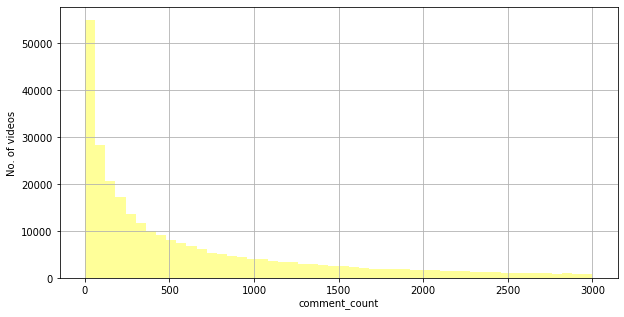

percentage of videos with likes less than 3000:


79.77934257795056

In [10]:
figure, ax = plt.subplots(figsize=(10,5))
figure = sns.distplot(df[df["comment_count"] < 3000]["comment_count"], color="yellow",kde=False,
                      ax=ax)
figure = ax.set(xlabel="comment_count", ylabel="No. of videos")
plt.grid(axis='both')
plt.show(figure)
print("percentage of videos with likes less than 3000:")
df[df['comment_count'] < 3000]['comment_count'].count() / df['comment_count'].count() * 100